-We need to be familiar with Mathplotlib (https://matplotlib.org/) and Seaborn (https://seaborn.pydata.org/) websites


In [3]:
import seaborn as sns 

In [5]:
data = sns.load_dataset('planets')

In [7]:
df = data.copy()  #df = data frame

In [8]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [9]:
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [11]:
df.dtypes #we want to change object to categoric

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [12]:
import pandas as pd

In [13]:
df["method"] = pd.Categorical(df.method)

In [14]:
df.dtypes 

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [15]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [16]:
df.shape #with .shape; we see that we have 1035 row,6 columns

(1035, 6)

In [17]:
df.columns #columns name

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [19]:
df.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [20]:
df.describe().T #take Transpose and rows and columns will change their places

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [21]:
df.describe(include=['category'])

,method
count,1035
unique,10
top,Radial Velocity
freq,553


In [23]:
df.isna().values #are the values NA? If there is NA, it return to True

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       ...,
       [False, False, False,  True, False, False],
       [False, False, False,  True, False, False],
       [False, False, False,  True, False, False]])

In [24]:
df.isna().values.any() #if the output is True, it means we have missing values

True

In [25]:
df.isna().sum() #see how many missing value we have

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [27]:
df["mass"].fillna(df.mass.mean(), inplace=True) #fill the missing values with mean value

In [29]:
df.isna().sum() #we can see the mass line become 0 because we filled the missing values with mean

method              0
number              0
orbital_period     43
mass                0
distance          227
year                0
dtype: int64

In [84]:
df.fillna(df.mean(), inplace=True) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [31]:
df.isna().sum() #we filled the all missing values with mean now

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [33]:
kat_df = df.select_dtypes(include=['category'])

In [34]:
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [35]:
kat_df.method.unique() #we can see which unique variable we have

['Radial Velocity', 'Imaging', 'Eclipse Timing Variations', 'Transit', 'Astrometry', 'Transit Timing Variations', 'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing', 'Pulsation Timing Variations']
Categories (10, object): ['Astrometry', 'Eclipse Timing Variations', 'Imaging', 'Microlensing', ...,
                          'Pulsation Timing Variations', 'Radial Velocity', 'Transit',
                          'Transit Timing Variations']

In [36]:
kat_df.method.nunique() #nunique= number of unique

10

In [37]:
kat_df.method.value_counts() #number of values

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

In [39]:
df['method'].value_counts() #same with the above code line

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

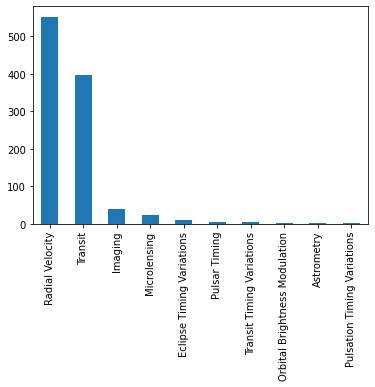

In [40]:
df['method'].value_counts().plot.bar()

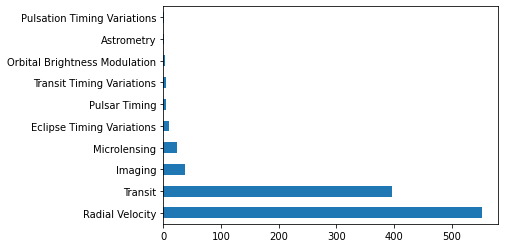

In [41]:
df['method'].value_counts().plot.barh() #barh= bar horizontal

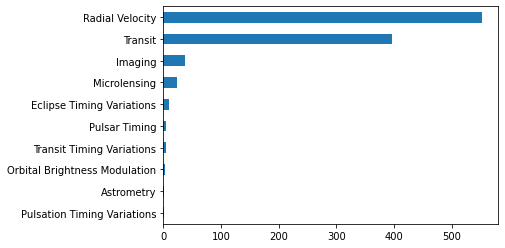

In [42]:
df['method'].value_counts().sort_values().plot.barh()

In [46]:
#Another example
jewelry = sns.load_dataset('diamonds')
data = jewelry.copy()
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [47]:
data['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [48]:
data['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [51]:
from pandas.api.types import CategoricalDtype #for changing it to categorical ordinal type

In [50]:
data.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [52]:
data.cut = data.cut.astype(CategoricalDtype(ordered=True)) #changing variable type to defined one

In [53]:
data.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

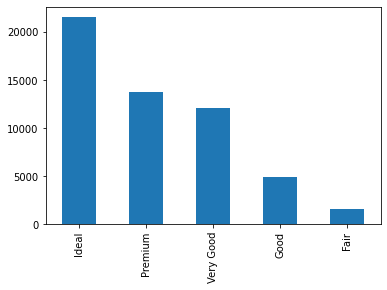

In [54]:
data.cut.value_counts().plot.bar()

Text(0.5, 1.0, 'cut block')

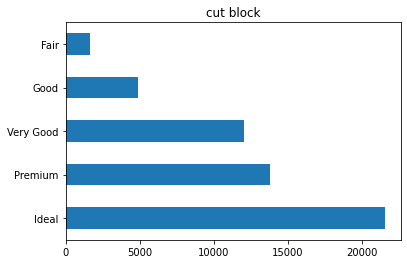

In [55]:
data.cut.value_counts().plot.barh().set_title("cut block")

In [57]:
cut_category = ['Fair', 'Good','Very Good','Ideal','Premium' ]

In [59]:
data.cut =data.cut.astype(CategoricalDtype(categories=cut_category, ordered= True)) #I can chenge the order with this line 

In [60]:
data.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Ideal' < 'Premium']

Text(0.5, 1.0, 'cut block')

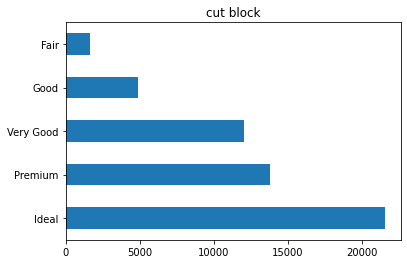

In [61]:
data["cut"].value_counts().plot.barh().set_title("cut block") #pandas plot visualization

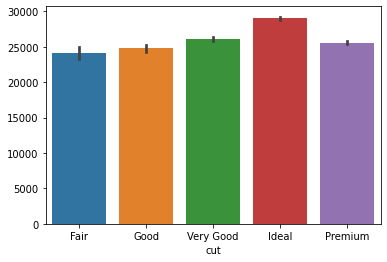

In [65]:
sns.barplot(x='cut', y=data.cut.index, data=data) #visualization with seaborn

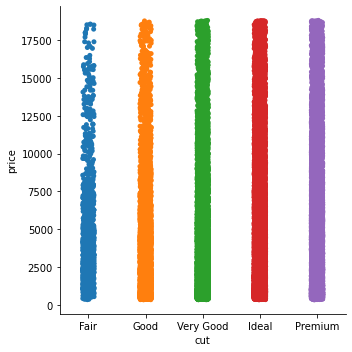

In [66]:
sns.catplot(x='cut', y='price', data=data)

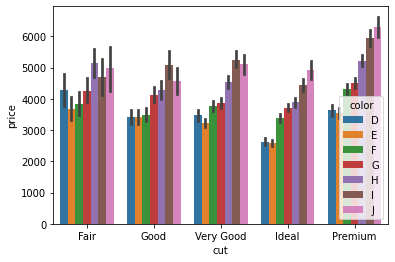

In [67]:
sns.barplot(x='cut', y='price', hue='color', data=data) #we added a third parameter with hue

In [68]:
# ?sns.barplot #it brings the help section and explanations

In [71]:
data.groupby(['cut','color'])['price'].mean() # we have data and we would like to group them

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Ideal      D        2629.094566
           E        2597.550090
           F        3374.939362
           G        3720.706388
           H        3889.334831
           I        4451.970377
           J        4918.186384
Premium    D        3631.292576
           E        3538.914420
           F        432

In [ ]:
#in order to find how many times a value is in your dataset,we use histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


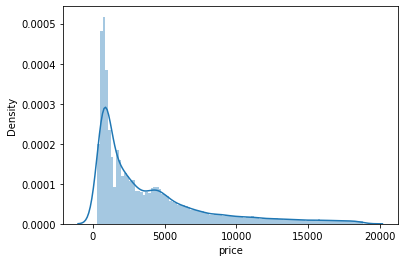

In [77]:
sns.distplot(data.price, kde=True, bins=100); #histogram #there is no line with false

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


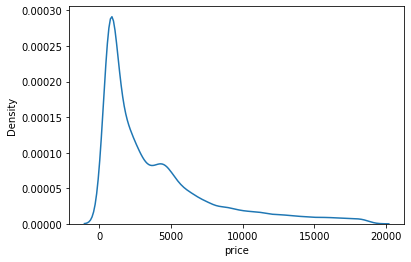

In [78]:
sns.distplot(data.price, hist=False);

In [ ]:
# ?sns.FacetGrid check the parameters here for the next step (for seaborn subplot)

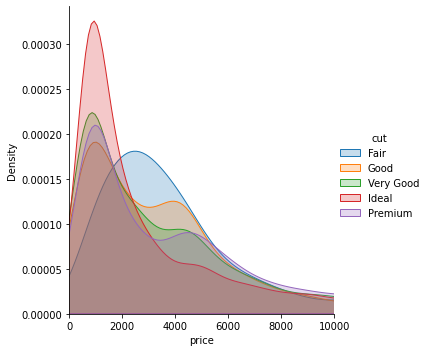

In [83]:
((sns.FacetGrid(data, hue='cut',
              height=5, 
              xlim= (0,10000))).map(sns.kdeplot,
                                    'price',shade=True).add_legend())